# Predicting House Prices Using Regression Models

**Authors:** Edric Jarvis Chua, Nikolai Santiago, Marc Daniel Marasigan, Sandeon Mikhail Gavan

**Section:** S12

# Section 1. Introduction to the problem/task and dataset

Using the House Prices dataset, our goal is to determine the house price using features that physically represents the house.

Problem Task: Regression task

# Section 2. Description of the dataset

## Dataset Description


This dataset encompasses the sale prices of houses in King County, spanning from May 2014 to May 2015. the dataset comprised over 20,000+ observations, spanning 21613 rows and 21 columns

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import csv

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint


%load_ext autoreload
%autoreload 2


Target of the analysis is the sales/Selling Price of the houses.

The predictors available to us: the sales date, renovation year, number of bedrooms and bathrooms, number of floors, the square footage of the houses (both living and lot), and available view of the waterfront. Also, the dataset contains the grade and condition of each house.


DATASET STRUCTURE

Each row represents specific values that cater to the datatype of each feature. Below is the Distribution of the data:

•continuous: sqft_living, sqft_lot, sqft_above, sqft_basement

•discrete: bedrooms, bathrooms, grade, floors, condition

•categorical: waterfront



Features:

*   id: A notation for a house
*   date: Date of sal
*   price: Sale price
*   bedrooms: Number of bedrooms
*   bathrooms: Number of bathrooms
*  sqft_living: Size of living area in square feet
*  sqft_lot: Size of the lot in square feet
*  floors: Total floors in the house
*  waterfront: '1' if the property has a waterfront, '0' if not.
*  view: An index from 0 to 4 indicating the quality of the property view
*  condition: Condition of the house, ranked from 1 to 5

*  grade: Classification by construction quality, indicating the types of  materials used and the quality of workmanship. Higher grade implies higher

*  construction quality, resulting in higher value.
*  sqft_above: Square feet above ground
*  sqft_basement: Square feet below ground
*  yr_built: Year the house was built
*  yr_renovated: Year the house was renovated ('0' if never renovated)
*  zipcode: 5-digit zip code
*  lat: Latitude coordinate
*  long: Longitude coordinate
*  sqft_living15: Average size of interior housing living space for the closest 15 houses, in square feet
*  sqft_lot15: Average size of land lots for the closest 15 houses, in square feet










In [ ]:
data = pd.read_csv("house_prices.csv")

In [ ]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [ ]:
num_instances = data.shape[0]
num_features = data.shape[1]

print("Number of instances:", num_instances)
print("Number of features:", num_features)

Number of instances: 21613
Number of features: 21


# Section 3. List of requirements

- NumPy (np): import numpy as np
- Pandas (pd): import pandas as pd
- Matplotlib (plt): import matplotlib.pyplot as plt
-Scikit-learn (sklearn): import sklearn
- Seaborn (sns): import seaborn as sns
- CSV (csv): import csv
- MinMaxScaler: from sklearn.preprocessing import MinMaxScaler
- Lasso: from sklearn.linear_model import Lasso
- GridSearchCV: from sklearn.model_selection  import GridSearchCV
- StandardScaler: from sklearn.preprocessing import StandardScaler
- Mean Squared Error: from sklearn.metrics import mean_squared_error
- Train-Test Split: from sklearn.model_selection import train_test_split
- Linear Regression: from sklearn.linear_model import LinearRegression
- Metrics: from sklearn import metrics



# Section 4. Data preprocessing and cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

We first convert the `date` feature into a more appropriate data type.

In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [ ]:
scaler = StandardScaler()

# Fit the scaler on the 'price' column and transform the values
data['price_normalized'] = scaler.fit_transform(data[['price']])
data['price_normalized']

0       -0.866717
1       -0.005688
2       -0.980849
3        0.174090
4       -0.081958
           ...   
21608   -0.490545
21609   -0.381588
21610   -0.375865
21611   -0.381588
21612   -0.585882
Name: price_normalized, Length: 21613, dtype: float64

In [ ]:
print(data.isna().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
price_normalized    0
dtype: int64


#### There are no Missing or Null Values

# Checking for Duplicates

In [ ]:

# List of column names to check for duplicates
columns_to_check = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Check for duplicates based on the specified columns
duplicates = data.duplicated(subset=columns_to_check, keep=False)

# Count the number of duplicate rows
count_duplicates = duplicates.sum()

# Filter the DataFrame to get the duplicate rows
duplicate_rows = data[duplicates]

print(count_duplicates)

print(duplicate_rows)


0
Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, price_normalized]
Index: []

[0 rows x 22 columns]


#### No duplicates were identified, suggesting that each entry in the dataset is unique. However, upon closer examination, it becomes evident that there are recurring IDs throughout the dataset

In [ ]:
duplicates = data.duplicated(subset=['id'], keep='first')

count_duplicates = duplicates.sum()

duplicate_rows = data[duplicates]

sorted_duplicate_rows = duplicate_rows.sort_values(['id', 'date'])

print(count_duplicates)
print(sorted_duplicate_rows)



177
               id       date      price  bedrooms  bathrooms  sqft_living  \
2497      1000102 2015-04-22   300000.0         6       3.00         2400   
16815     7200179 2015-04-24   175000.0         2       1.00          840   
11434   109200390 2014-10-20   250000.0         3       1.75         1480   
12418   123039336 2014-12-08   244900.0         1       1.00          620   
7793    251300110 2015-01-14   358000.0         3       2.25         2510   
...           ...        ...        ...       ...        ...          ...   
2494   9407110710 2015-02-26   322000.0         3       1.75         1510   
4923   9809000020 2015-03-13  1940000.0         5       2.25         3120   
6346   9828200460 2015-01-06   430000.0         2       1.00          700   
15200  9834200305 2015-02-10   615000.0         3       1.00         1790   
1086   9834200885 2015-04-20   550000.0         4       2.50         2080   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_baseme

#### 177 instances of duplicated houses were identified, suggesting that the same properties were sold on more than one occasion at later dates.

# Exploratory Data Analysis

In our Exploratory Data Analysis, we will analyze each numerical value of each house feature and compare the values of each feature based on their ranges and correlations. To begin, we must find each feature's correlation in 'price' to determine which feature has the greatest influence on a house's price.

## Descriptive Statistics

In [ ]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

       ...    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  ...  21613.000000   21613.000000  21613.000000  21613.000000   
mean   ...   1788.390691     291.509045   1971.005136     84.402258   
std    ...    828.090978     442.575043     29.373411    401.679240   
min    ...    290.000000       0.000000   1900.000000      0.000000   
25%    ...   1190.000000       0.000000   1951.000000      0.000000   
50%    ...   1560.000000       0.000000   1975.000000      0.000000   
75%    ...   2210.000000     560.000000   1997.000000      0.000000   
max    ...   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  \
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000   
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652   
std       53.505026      0.138564      0.140828     685.391304   27304.179631   
min    98001.000000     47.155900   -122.519000     399.000000     651.000000   
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000   
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000   
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000   
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000   

       price_normalized  
count      2.161300e+04  
mean      -3.682080e-17  
std        1.000023e+00  
min       -1.266860e+00  
25%       -5.941897e-01  
50%       -2.453924e-01  
75%        2.857709e-01  
max        1.950299e+01  

[8 rows x 21 columns]

## Visualization

We used Pearson correlation matrix to measure the linear relationship between features/variables.The Pearson correlation coefficient ranges from -1 to +1. A value close to 1 indicates a strong positive linear relationship between the two features, meaning that as one feature increases, the other also increases. A value close to -1 indicates a strong negative linear relationship, meaning that as one feature increases, the other decreases. A value close to 0 indicates no linear relationship, meaning the two features are independent of each other.

All Features and their Correlation with Price:
price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64


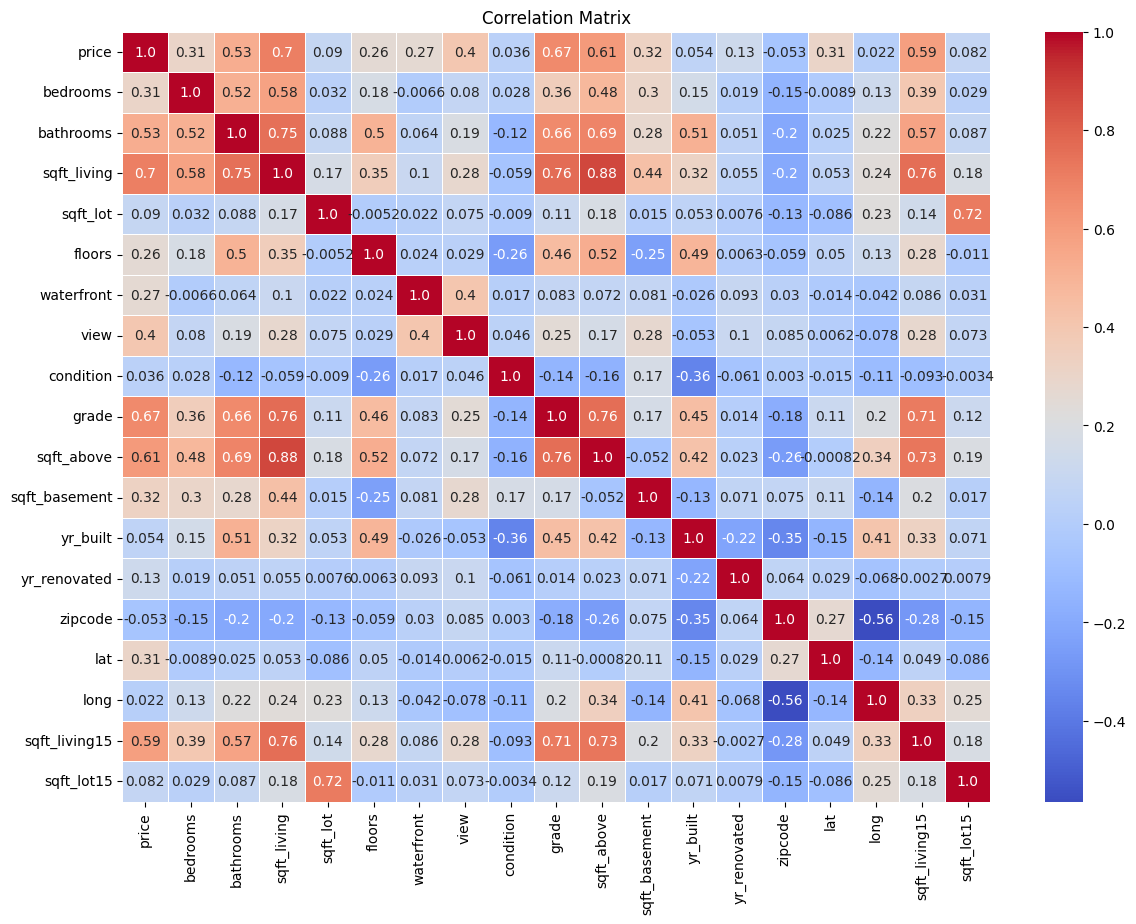

In [ ]:

selected_columns = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
    'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'
]


selected_data = data[selected_columns]

correlation_matrix = selected_data.corr()

# Sort the absolute correlations with price in descending order
correlation_with_price = correlation_matrix['price'].abs().sort_values(ascending=False)

# Display all features and their correlation with price
print("All Features and their Correlation with Price:")
print(correlation_matrix.loc[:, 'price'].sort_values(ascending=False))

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We mainly check the correlation line on the left side of the matrix that determines the correlation
between 'price' and the other features. Since in our main goal is to determine the house price using features that physically represents the house, we exclude yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15

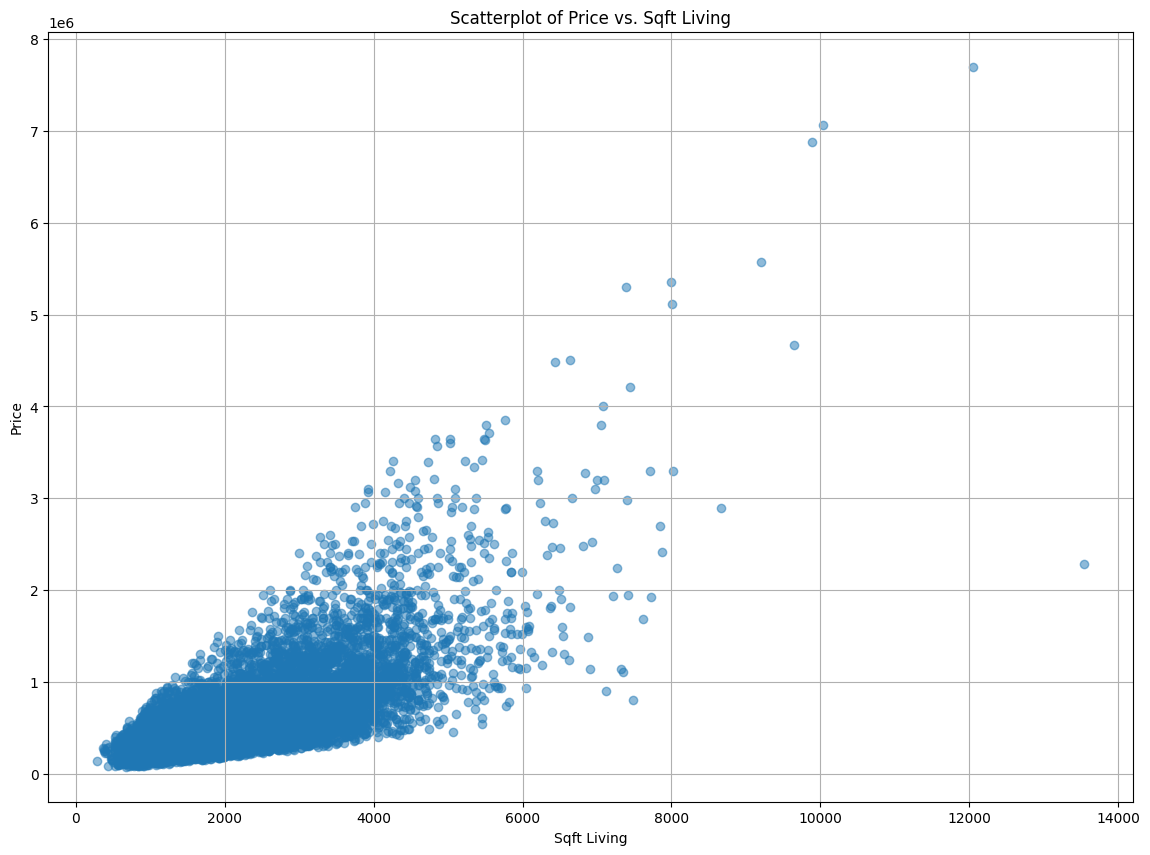

In [ ]:
# sqft_living scatterplot
price = data['price']
sqft_living = data['sqft_living']

plt.figure(figsize=(14, 10))
plt.scatter(sqft_living, price, alpha=0.5)
plt.title('Scatterplot of Price vs. Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.grid(True)
plt.show()

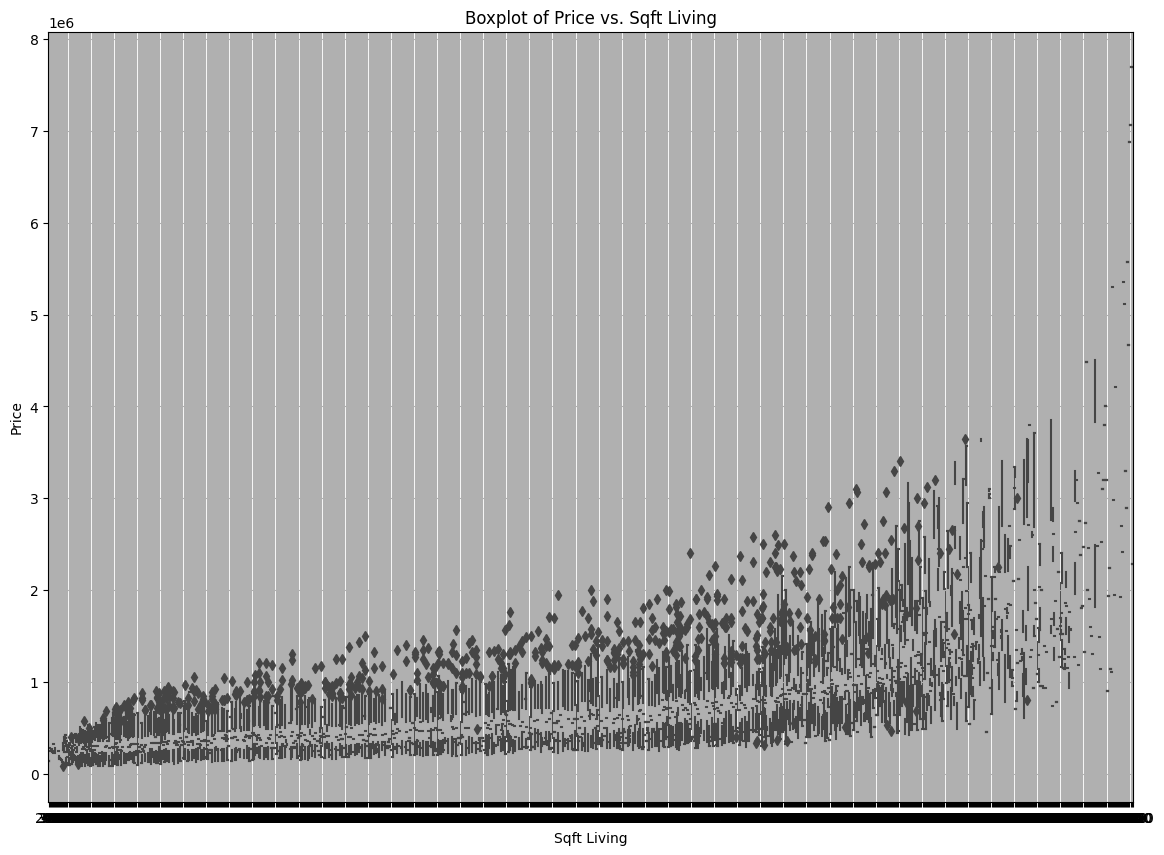

In [ ]:
# sqft_living boxplot
plt.figure(figsize=(14, 10))
sns.boxplot(x=sqft_living, y=price)
plt.title('Boxplot of Price vs. Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Using scatter plot and box plot visualization, we can see the positive correlation of 'price' and 'sqft_living'. As the value 'sqft_living' increases, so does the value of 'price'. sqft_living has the highest correlation coefficient value for price.

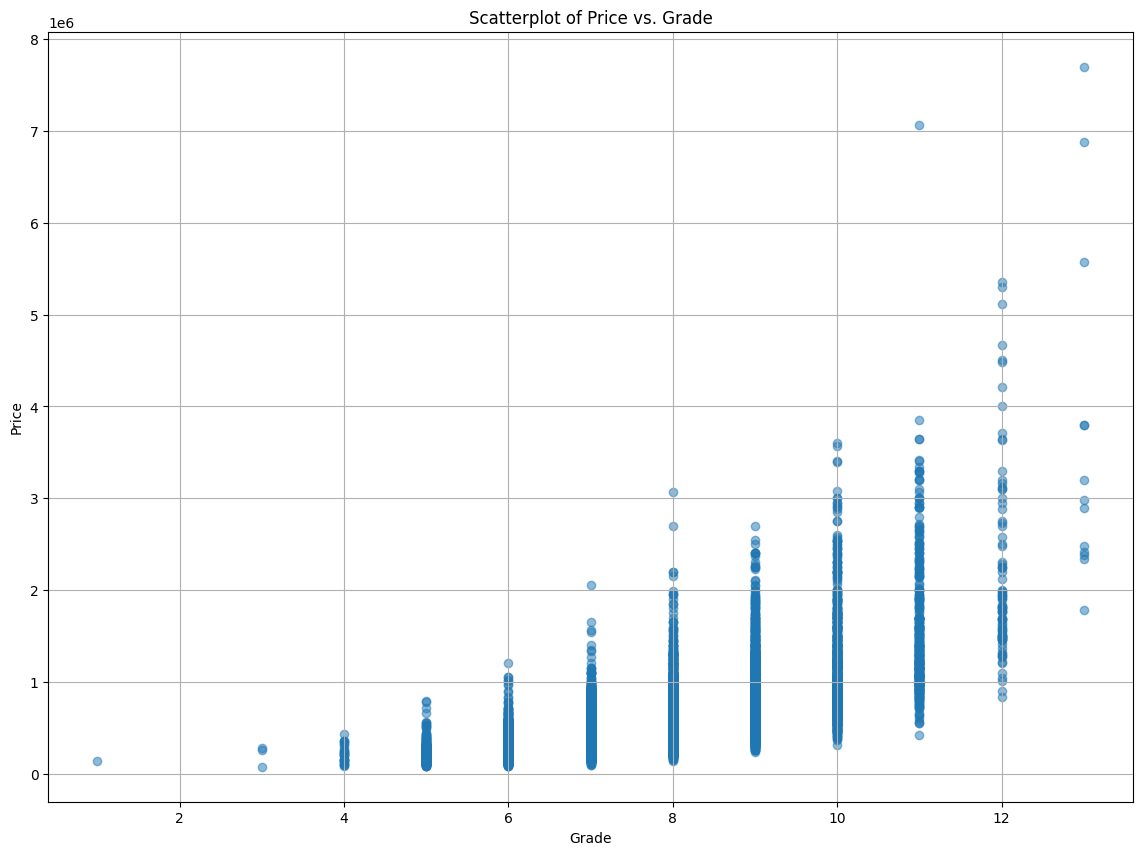

In [ ]:
# grade scatterplot
grade = data['grade']

plt.figure(figsize=(14, 10))
plt.scatter(grade, price, alpha=0.5)
plt.title('Scatterplot of Price vs. Grade')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.grid(True)
plt.show()

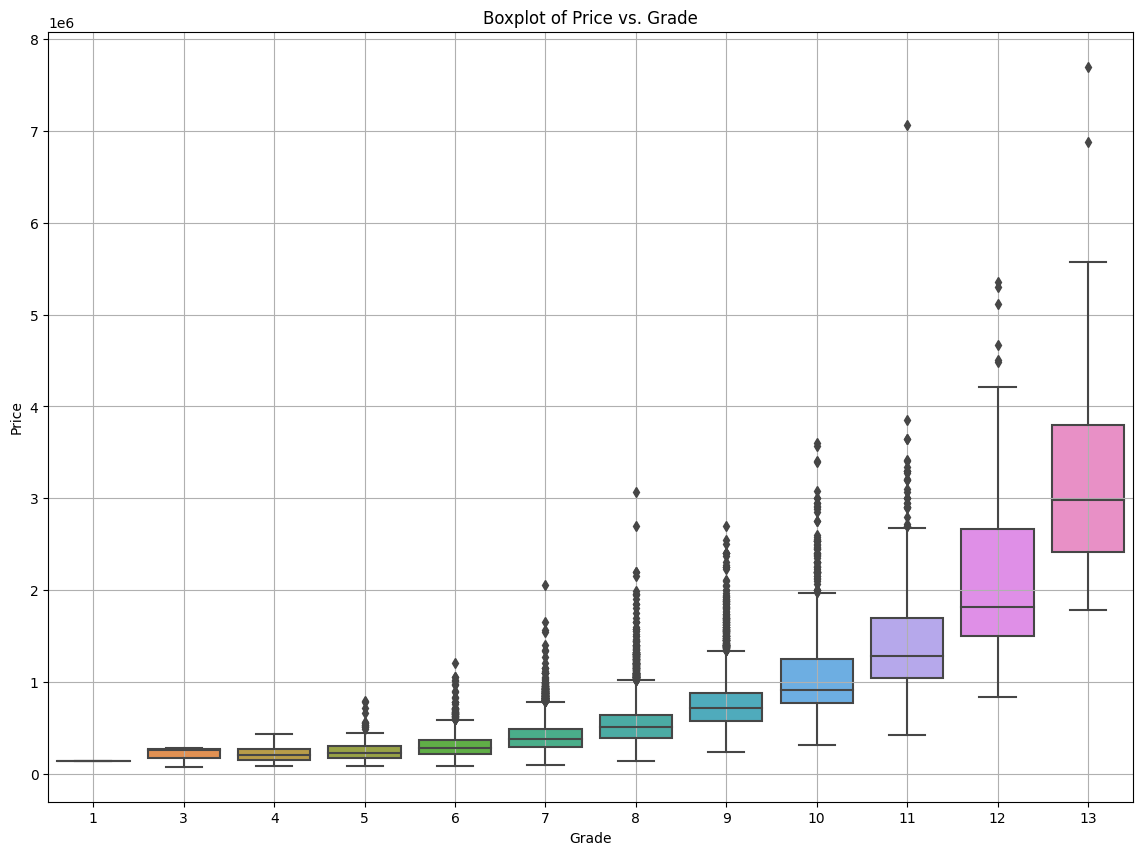

In [ ]:
# grade boxplot
plt.figure(figsize=(14, 10))
sns.boxplot(x=grade, y=price)
plt.title('Boxplot of Price vs. Grade')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Using scatter plot and box plot visualization, we can see the positive correlation of 'price' and 'grade'. As the 'grade' value increases, so does the value of 'price' even if 'grade' is a numeric categorical feature.

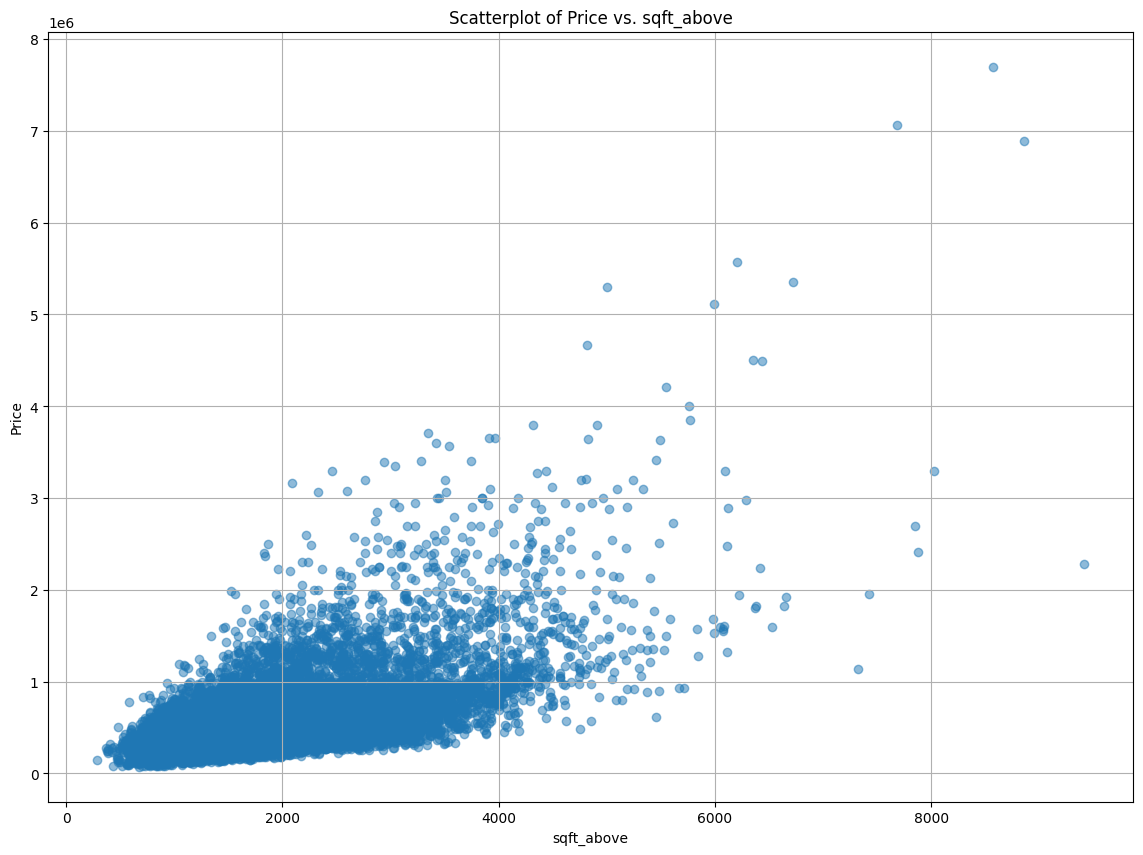

In [ ]:
above = data['sqft_above']

plt.figure(figsize=(14, 10))
plt.scatter(above, price, alpha=0.5)
plt.title('Scatterplot of Price vs. sqft_above')
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.grid(True)
plt.show()

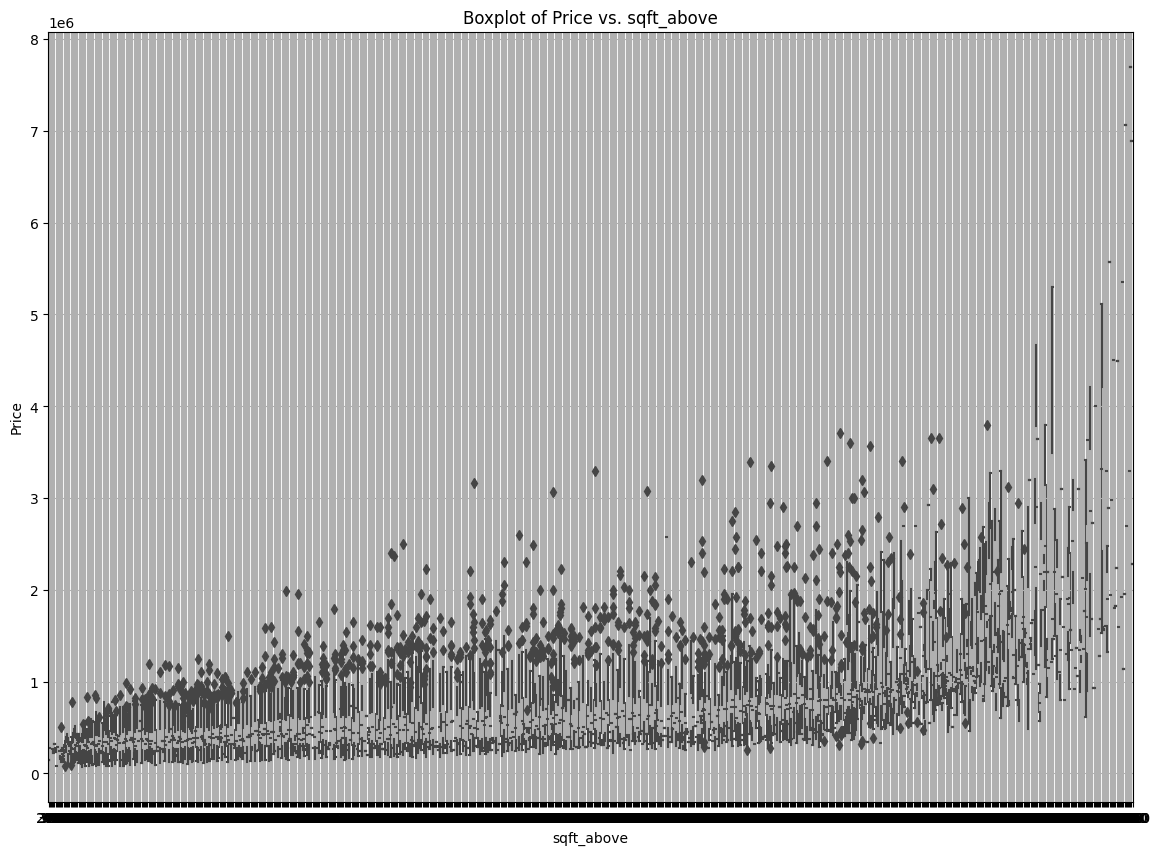

In [ ]:
plt.figure(figsize=(14, 10))
sns.boxplot(x=above, y=price)
plt.title('Boxplot of Price vs. sqft_above')
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Using scatter plot and box plot visualization, we can see the positive correlation of 'price' and 'sqft_above'. As the 'sqft_above' value increases, so does the value of 'price'

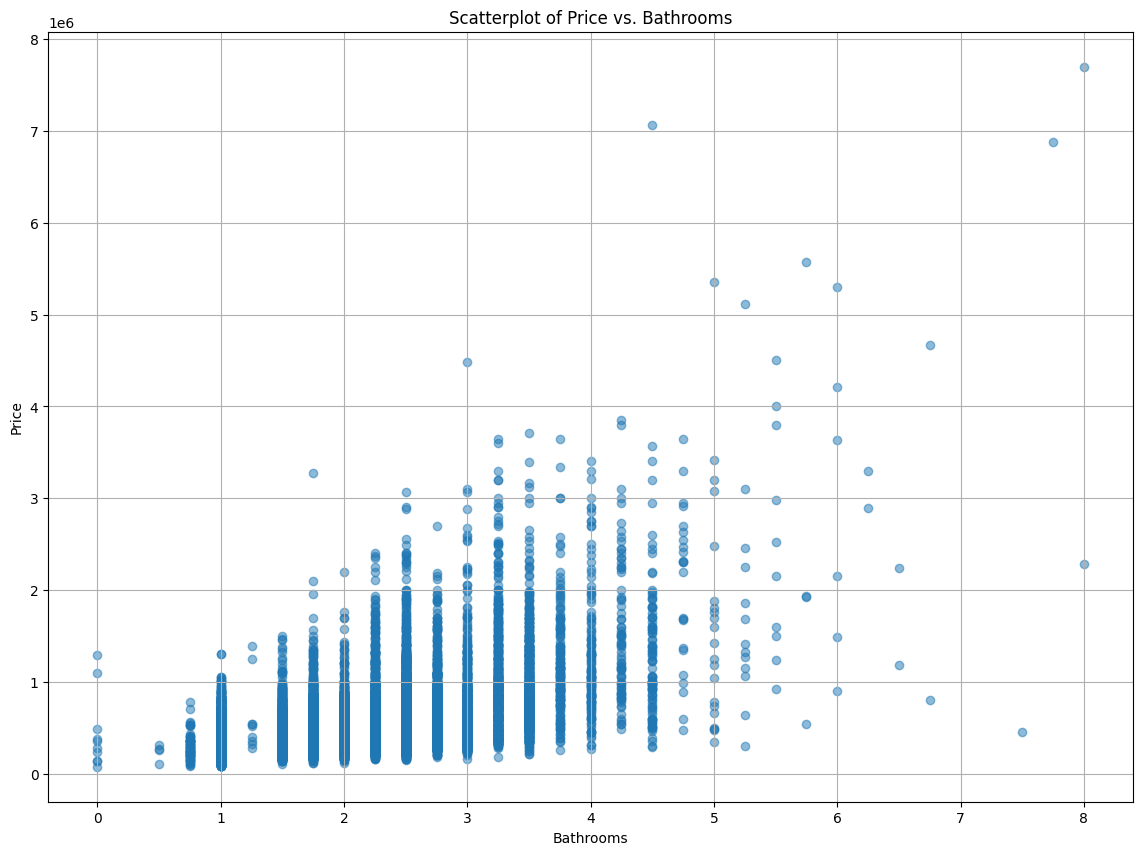

In [ ]:
# bathrooms scatterplot
bathrooms = data['bathrooms']

plt.figure(figsize=(14, 10))
plt.scatter(bathrooms, price, alpha=0.5)
plt.title('Scatterplot of Price vs. Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

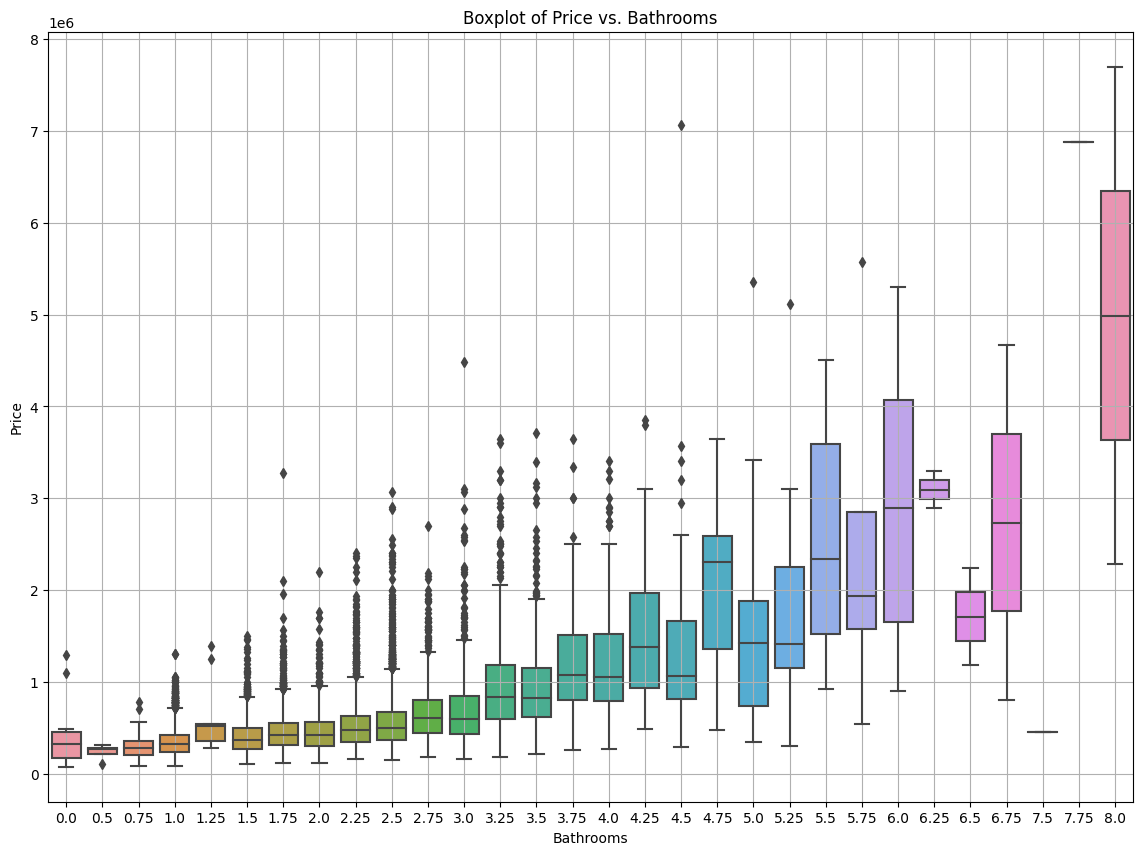

In [ ]:
# bathrooms boxplot
plt.figure(figsize=(14, 10))
sns.boxplot(x=bathrooms, y=price)
plt.title('Boxplot of Price vs. Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Using scatter plot and box plot visualization, we can see the positive correlation of 'price' and 'bathrooms' with some outliers. As the value of 'bathrooms' increases, so does the value of 'price' despite 'bathroom' being a numeric categorical feature.

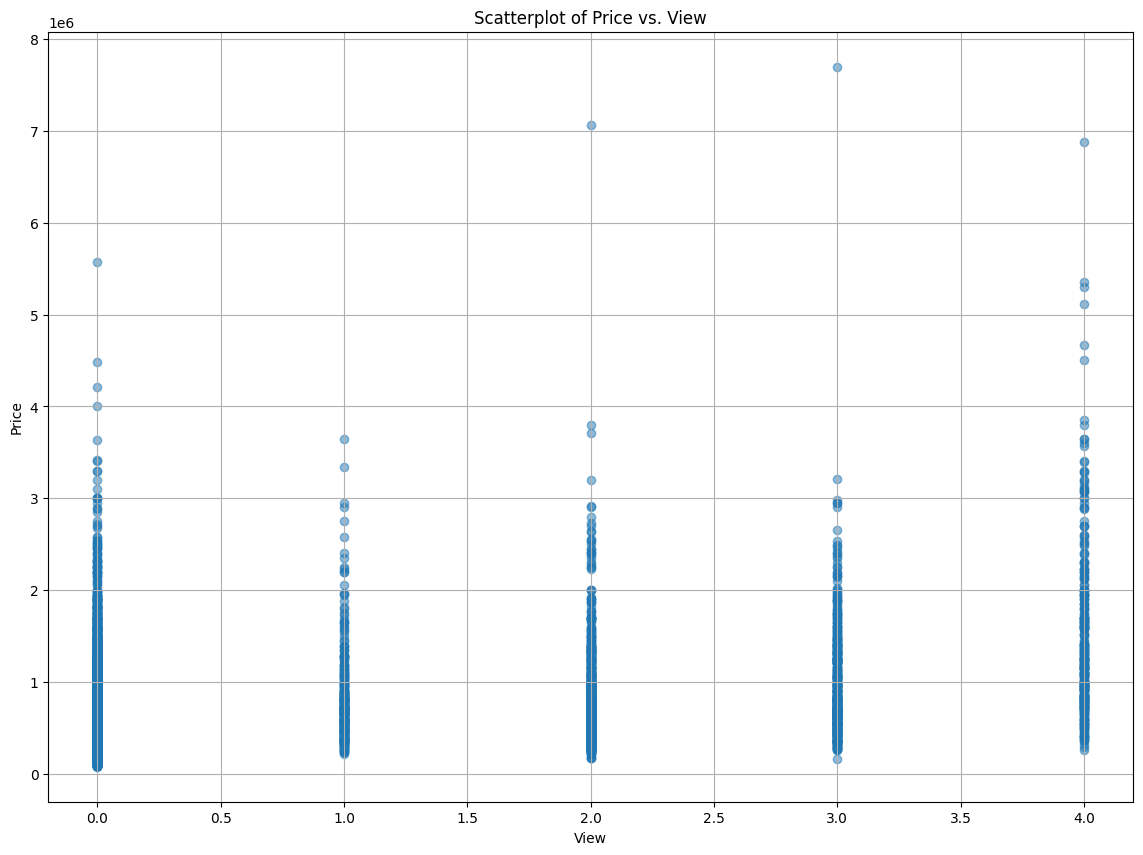

In [ ]:
# view scatterplot
view = data['view']

plt.figure(figsize=(14, 10))
plt.scatter(view, price, alpha=0.5)
plt.title('Scatterplot of Price vs. View')
plt.xlabel('View')
plt.ylabel('Price')
plt.grid(True)
plt.show()

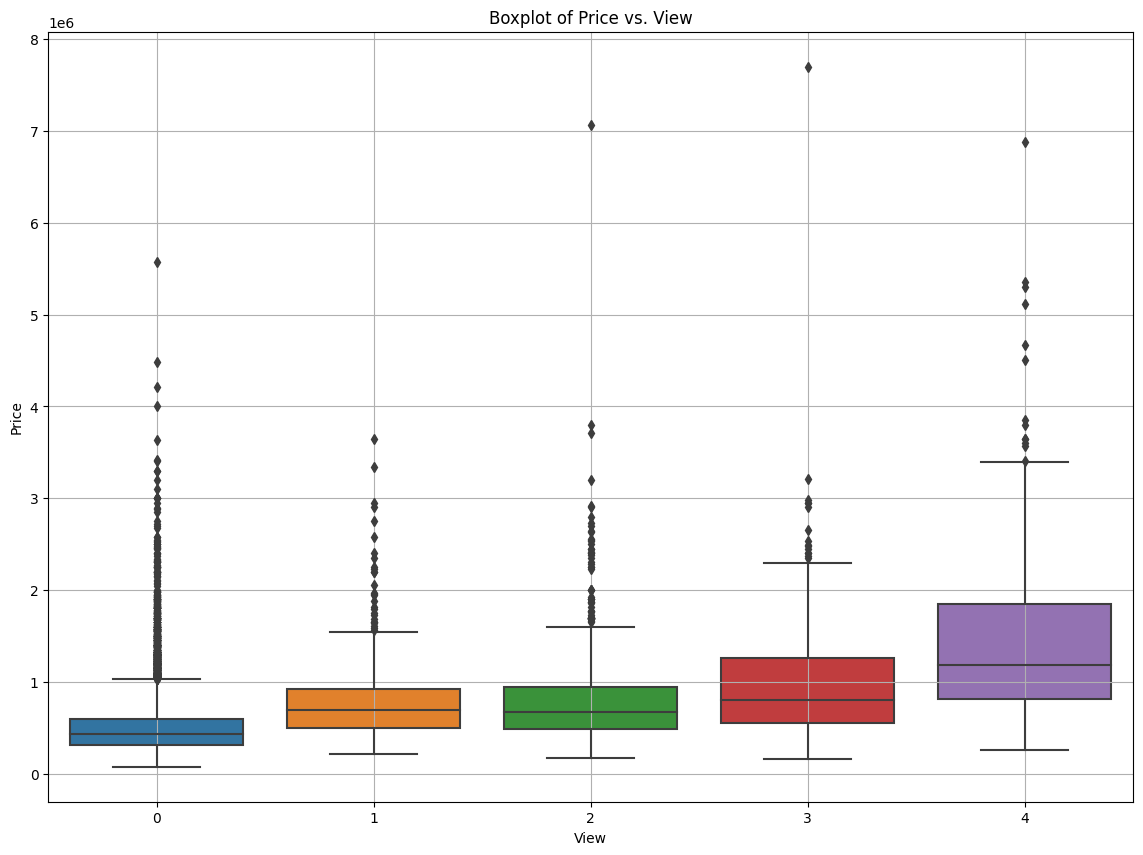

In [ ]:
# view boxplot
plt.figure(figsize=(14, 10))
sns.boxplot(x=view, y=price)
plt.title('Boxplot of Price vs. View')
plt.xlabel('View')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Using scatter plot and box plot visualization, we can see the positive correlation of 'price' and 'view' but 'view' is a numeric categorical feature. The pattern of the correlation is not very close to a linear trend.

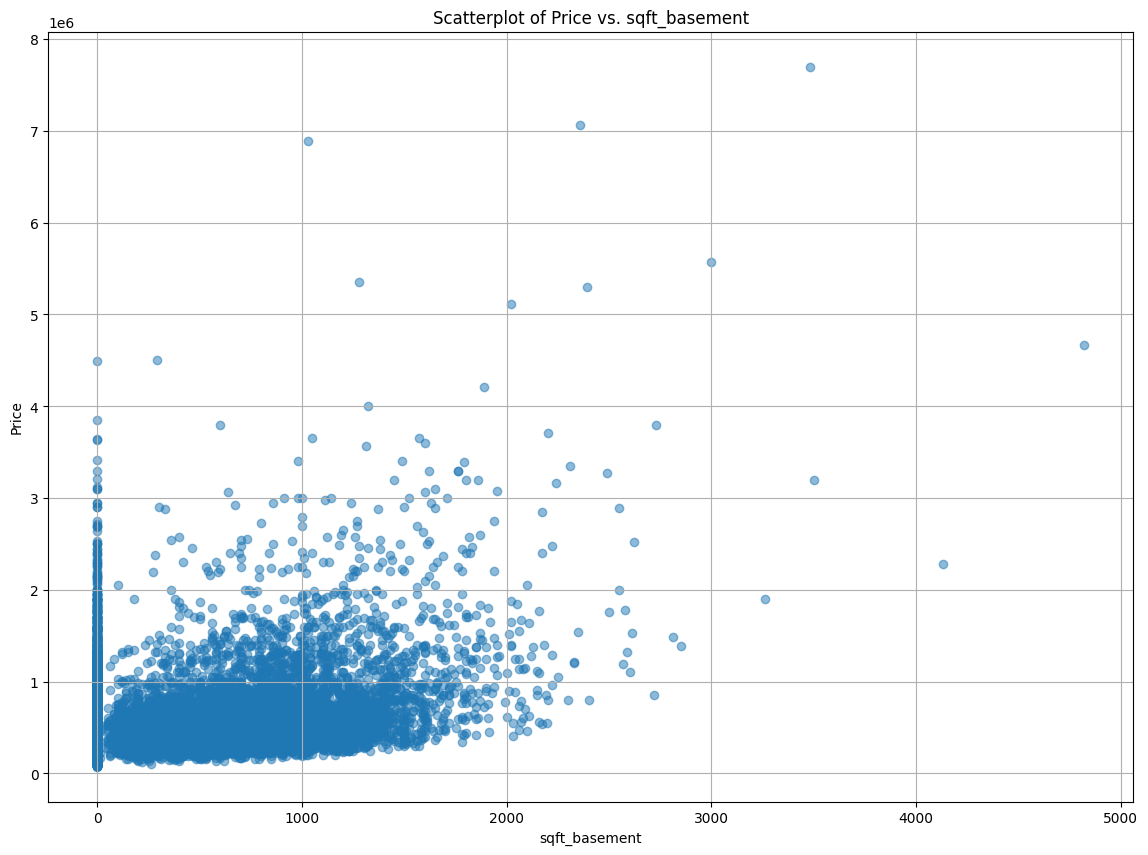

In [ ]:
basement = data['sqft_basement']

plt.figure(figsize=(14, 10))
plt.scatter(basement, price, alpha=0.5)
plt.title('Scatterplot of Price vs. sqft_basement')
plt.xlabel('sqft_basement')
plt.ylabel('Price')
plt.grid(True)
plt.show()

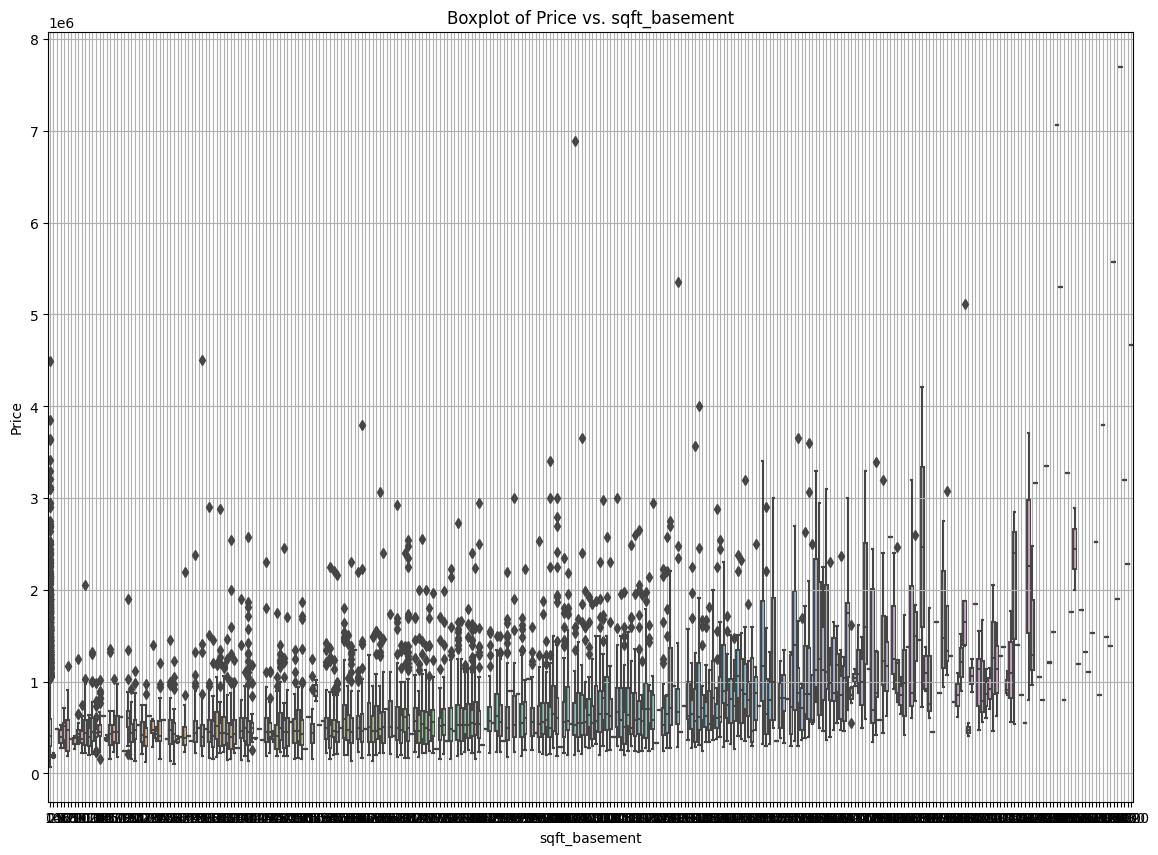

In [ ]:
plt.figure(figsize=(14, 10))
sns.boxplot(x=basement, y=price)
plt.title('Boxplot of Price vs. sqft_basement')
plt.xlabel('sqft_basement')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Using scatter plot and box plot visualization, we can see the positive correlation of 'price' and 'sqft_basement' with some outliers. As the value of 'sqft_basement' increases, so does the value of 'price'.

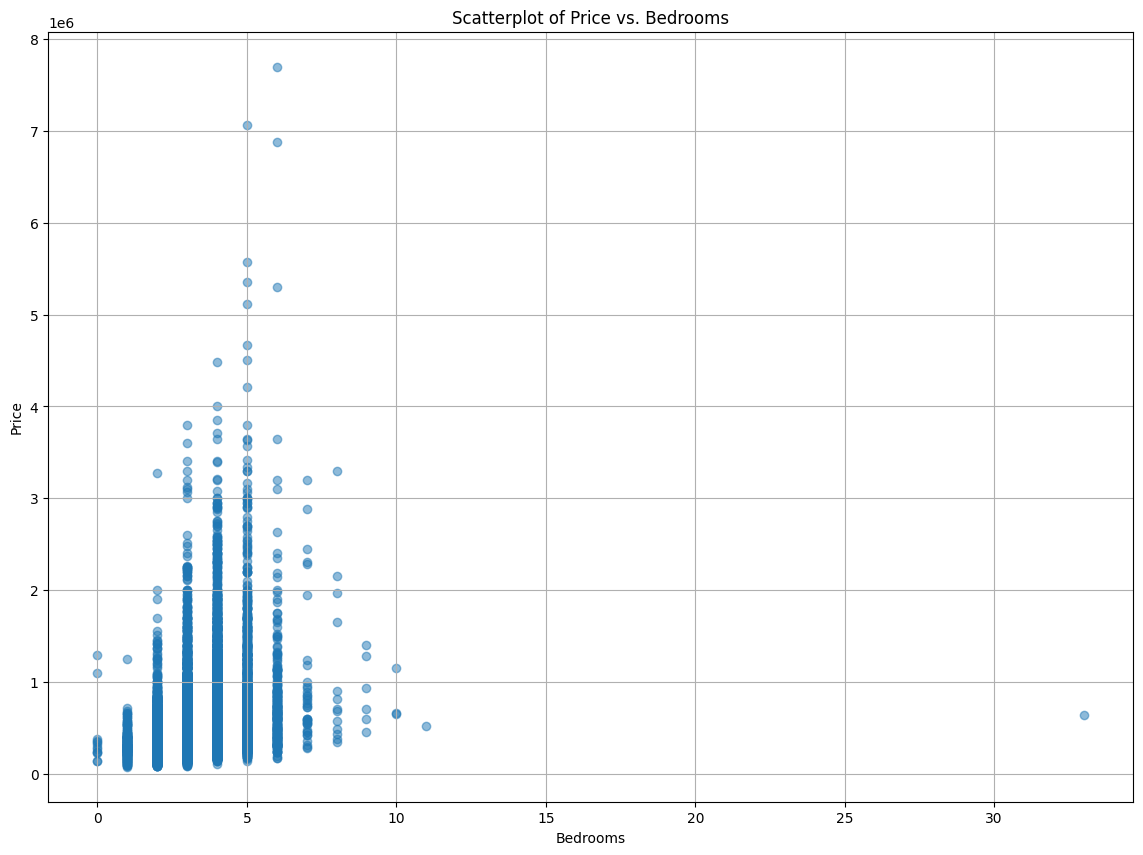

In [ ]:
# bedrooms scatterplot
bedrooms = data['bedrooms']

plt.figure(figsize=(14, 10))
plt.scatter(bedrooms, price, alpha=0.5)
plt.title('Scatterplot of Price vs. Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

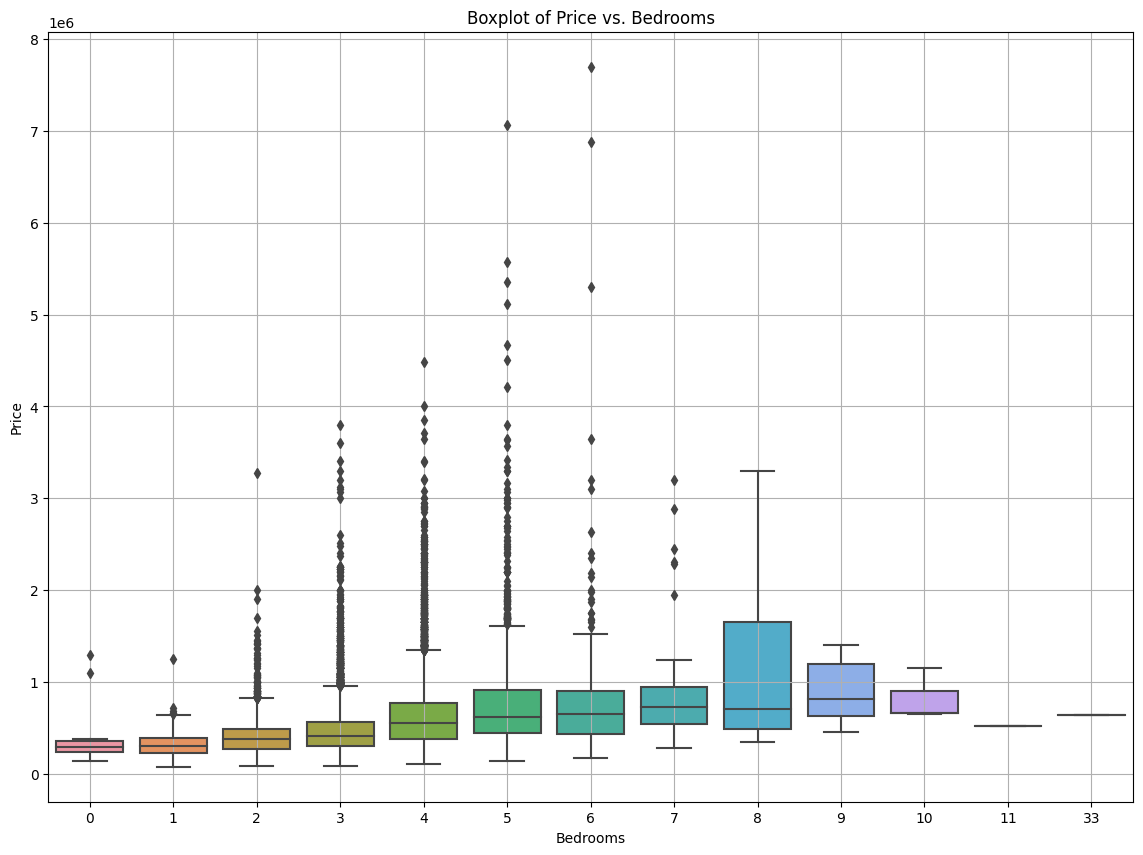

In [ ]:
# bedrooms boxplot
plt.figure(figsize=(14, 10))
sns.boxplot(x=bedrooms, y=price)
plt.title('Boxplot of Price vs. Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Using scatter plot and box plot visualization, we can see the positive correlation of 'price' and 'bedrooms' but 'bedrooms' is a numeric categorical feature. The pattern of the correlation is not very close to a linear trend and has one big outlier.

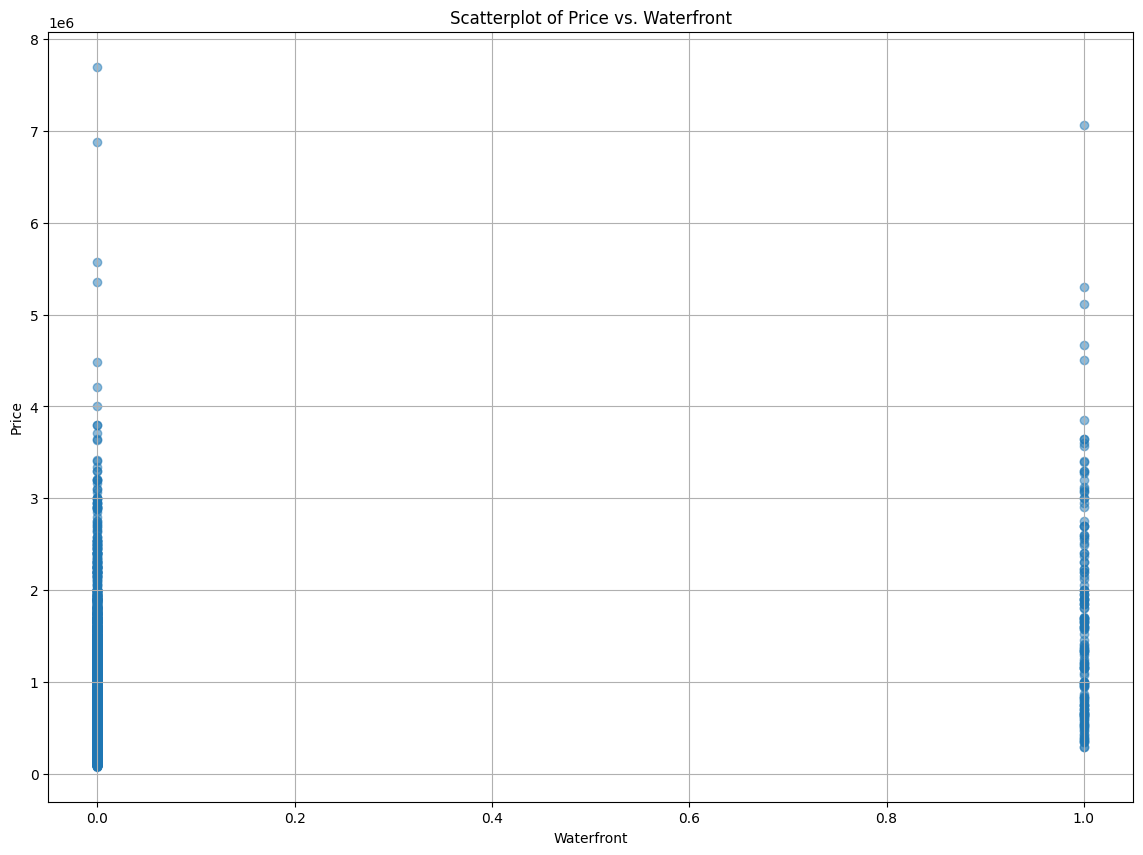

In [ ]:
waterfront = data['waterfront']

plt.figure(figsize=(14, 10))
plt.scatter(waterfront, price, alpha=0.5)
plt.title('Scatterplot of Price vs. Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.grid(True)
plt.show()

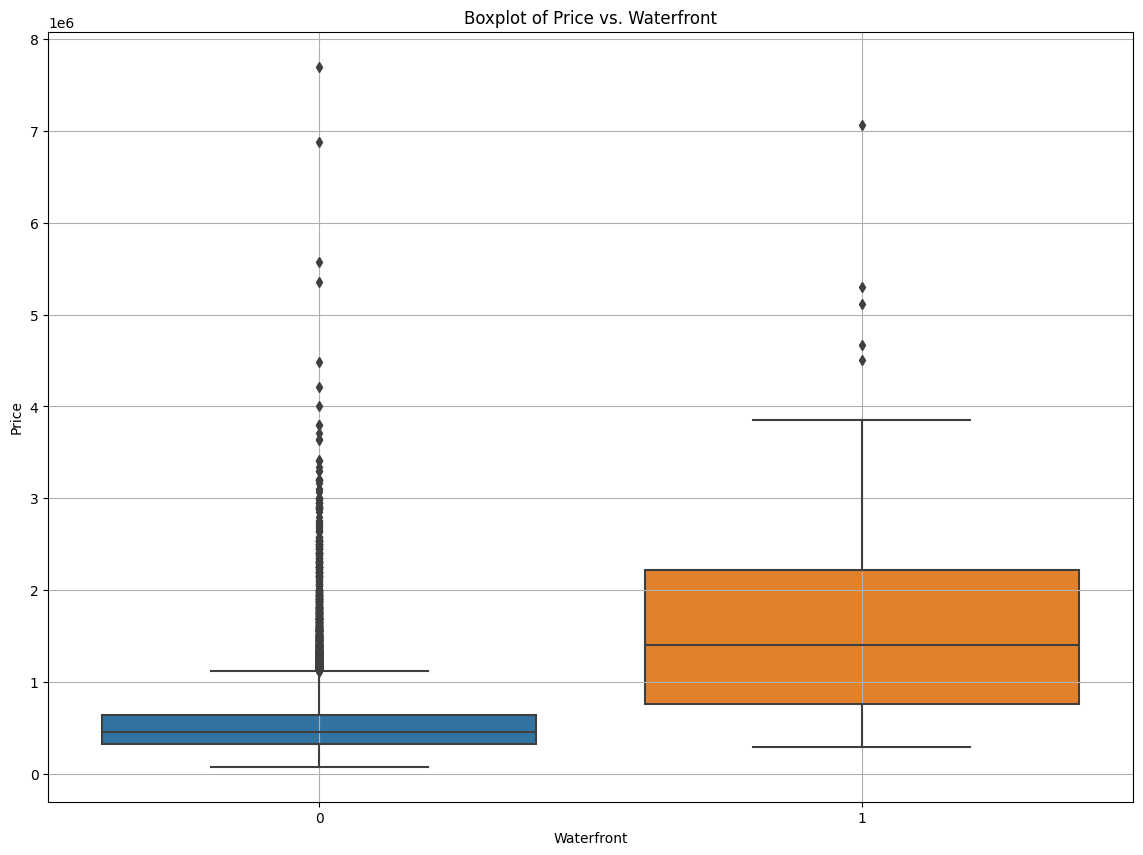

In [ ]:
plt.figure(figsize=(14, 10))
sns.boxplot(x=waterfront, y=price)
plt.title('Boxplot of Price vs. Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Using scatter plot and box plot visualization, we can see the low positive correlation of 'price' and 'waterfront' but 'waterfront' is a numeric binary categorical feature. The pattern of the correlation is not a linear trend.

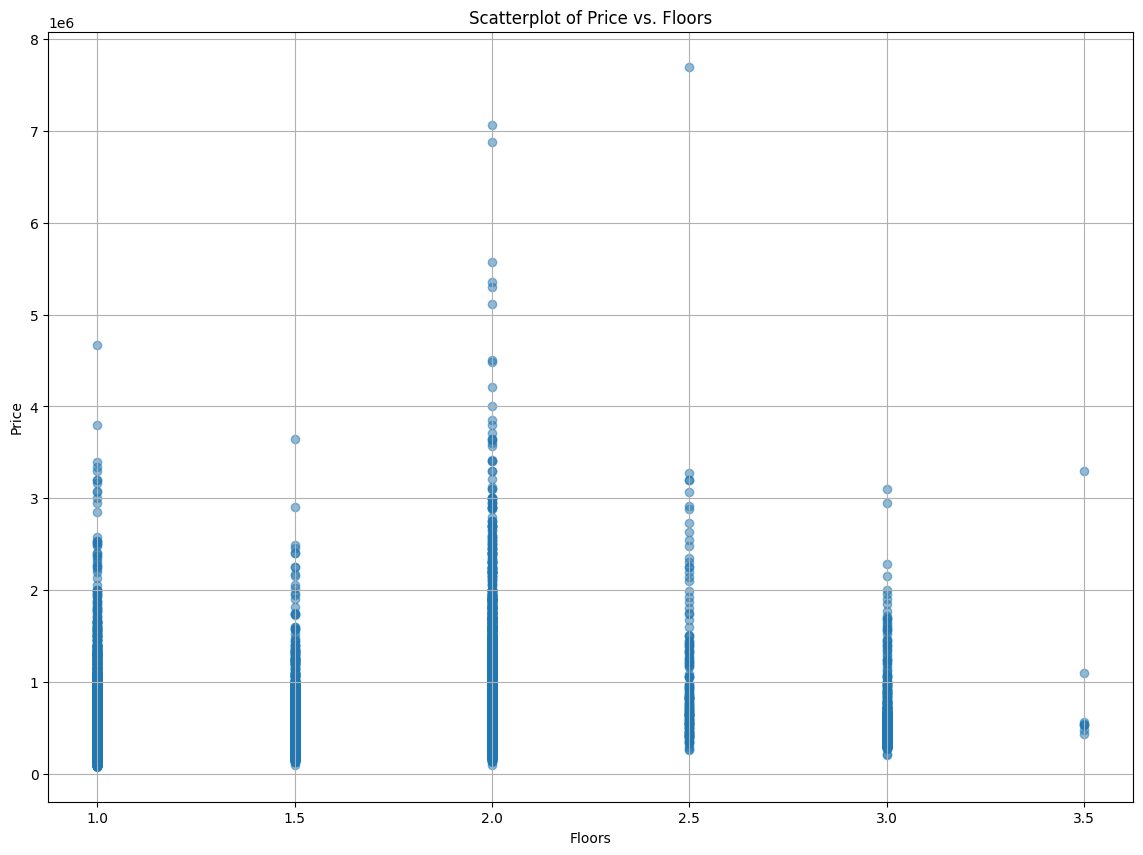

In [ ]:
floors = data['floors']

plt.figure(figsize=(14, 10))
plt.scatter(floors, price, alpha=0.5)
plt.title('Scatterplot of Price vs. Floors')
plt.xlabel('Floors')
plt.ylabel('Price')
plt.grid(True)
plt.show()

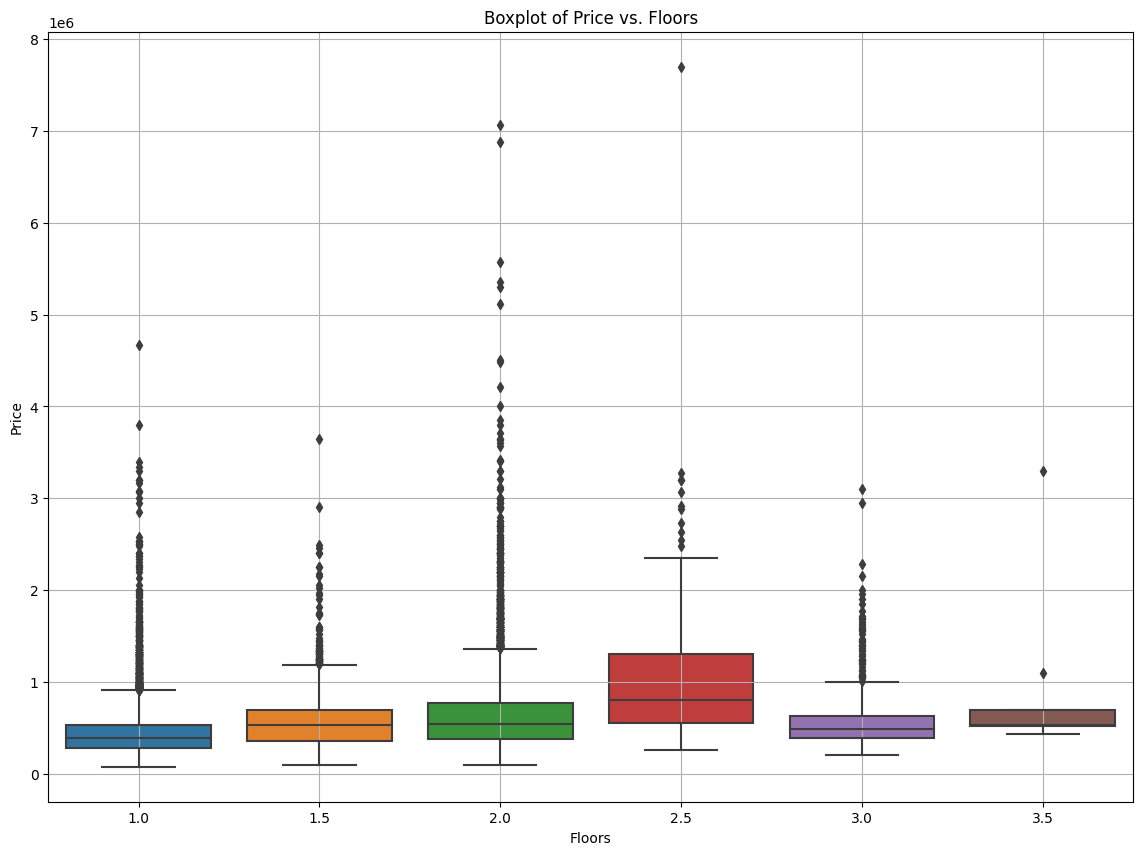

In [ ]:
plt.figure(figsize=(14, 10))
sns.boxplot(x=floors, y=price)
plt.title('Boxplot of Price vs. Floors')
plt.xlabel('Floors')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Using scatter plot and box plot visualization, we can see the positive correlation of 'price' and 'floors' but 'floors' is a numeric categorical feature. The pattern of the correlation is not very close to a linear trend.

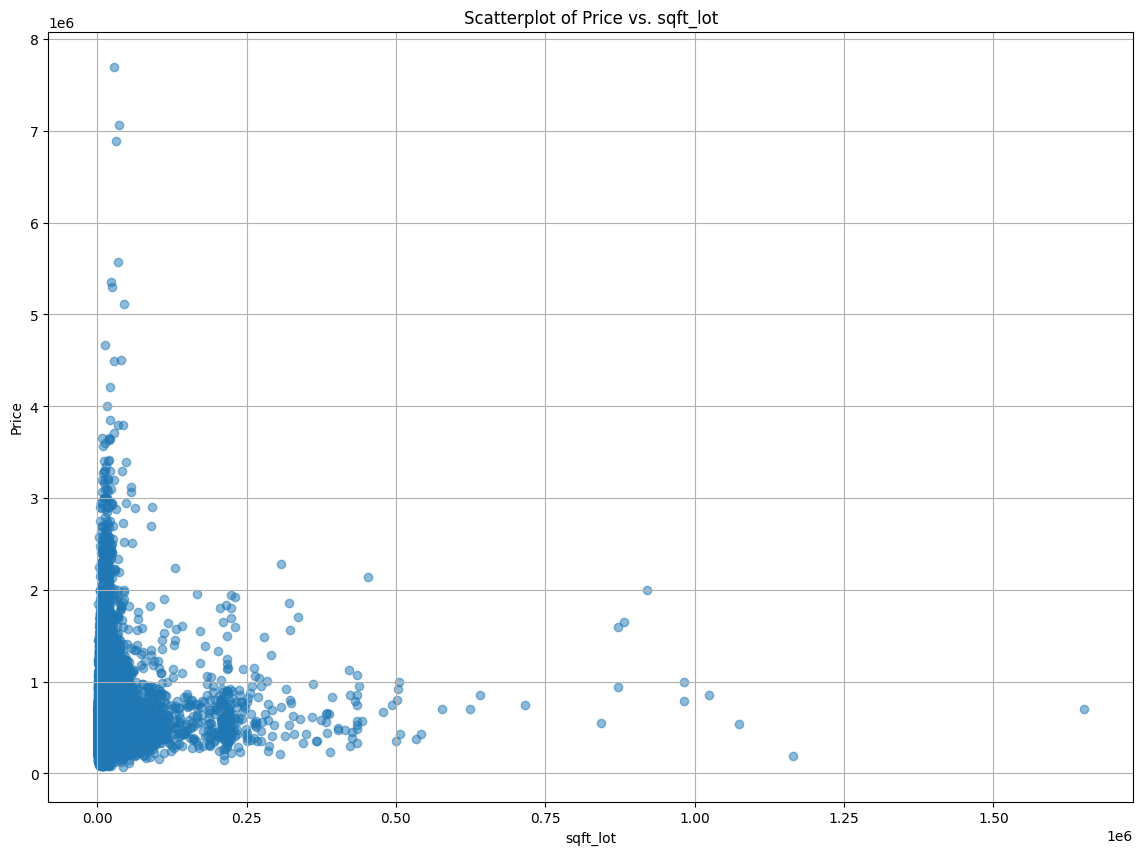

In [ ]:
lot = data['sqft_lot']

plt.figure(figsize=(14, 10))
plt.scatter(lot, price, alpha=0.5)
plt.title('Scatterplot of Price vs. sqft_lot')
plt.xlabel('sqft_lot')
plt.ylabel('Price')
plt.grid(True)
plt.show()

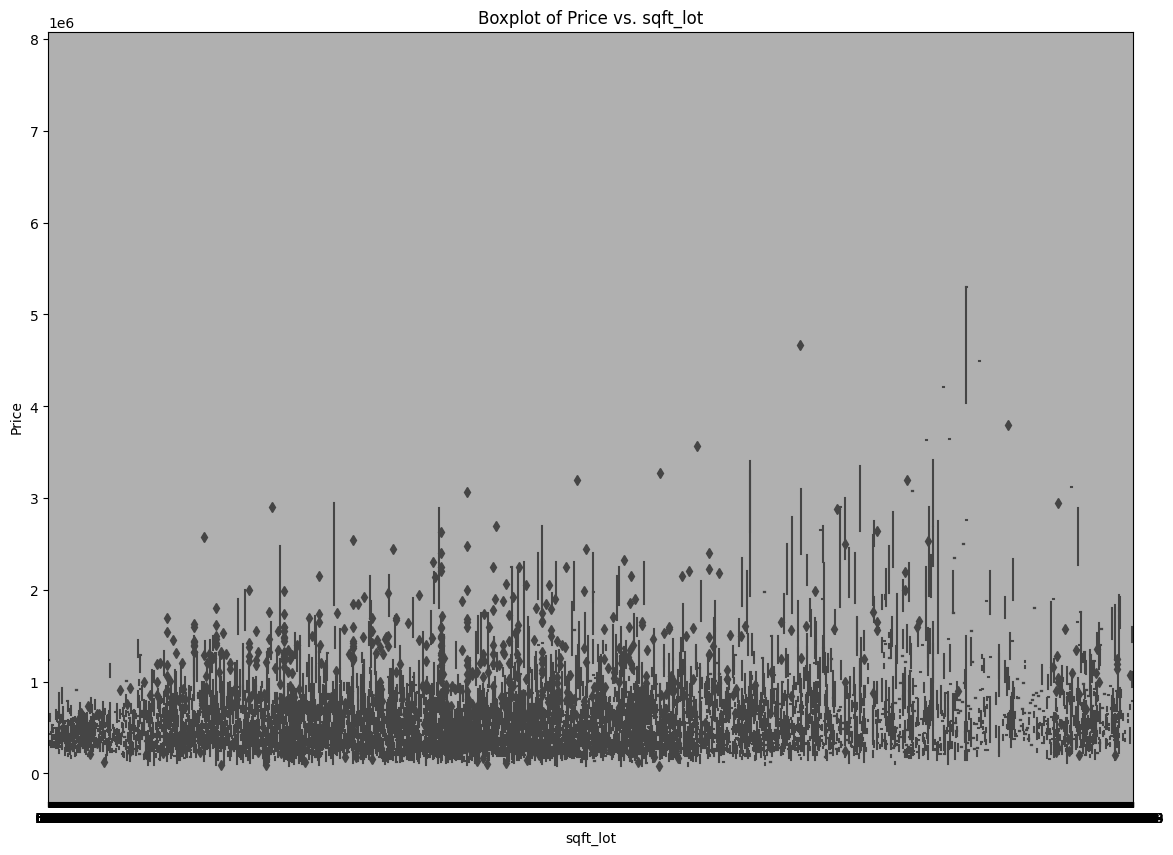

In [ ]:
plt.figure(figsize=(14, 10))
sns.boxplot(x=lot, y=price)
plt.title('Boxplot of Price vs. sqft_lot')
plt.xlabel('sqft_lot')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Using the scatter plot and boxplot, we can see that there is a linear trend on 'sqft_lot' despite its near zero correlation.

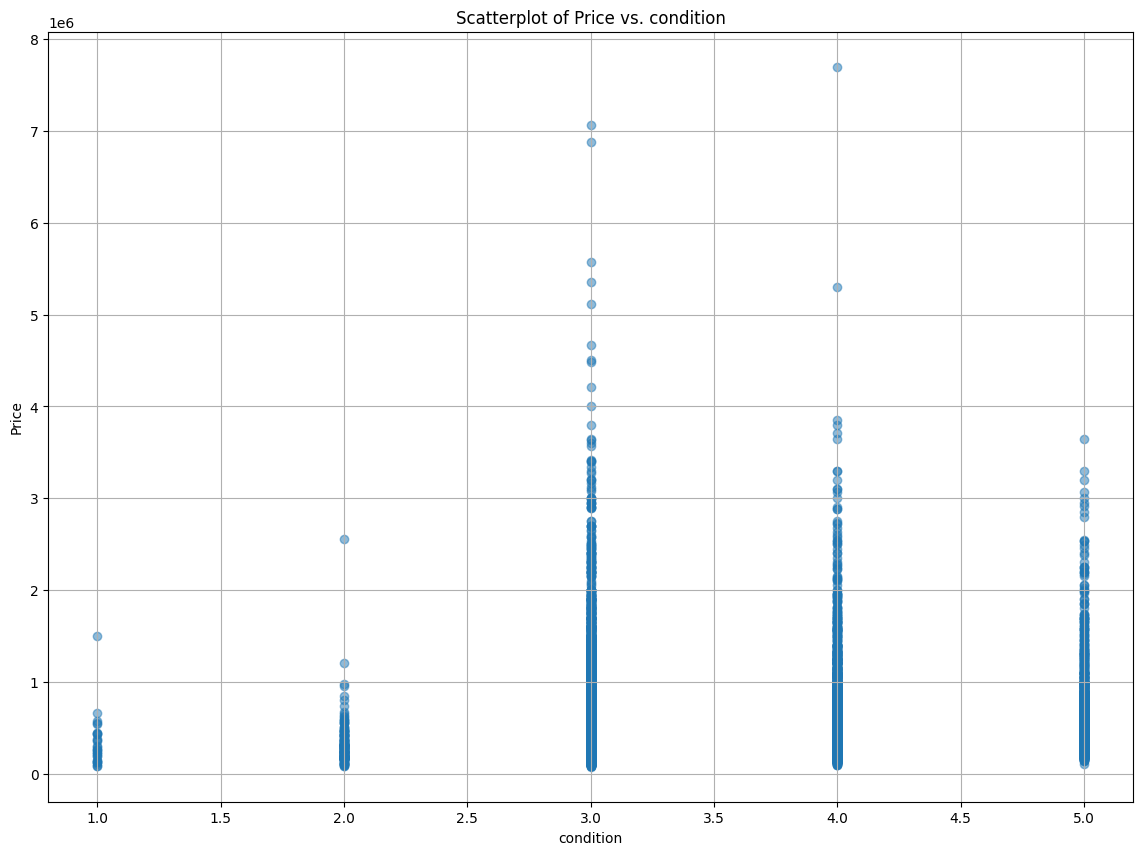

In [ ]:
condi = data['condition']

plt.figure(figsize=(14, 10))
plt.scatter(condi, price, alpha=0.5)
plt.title('Scatterplot of Price vs. condition')
plt.xlabel('condition')
plt.ylabel('Price')
plt.grid(True)
plt.show()

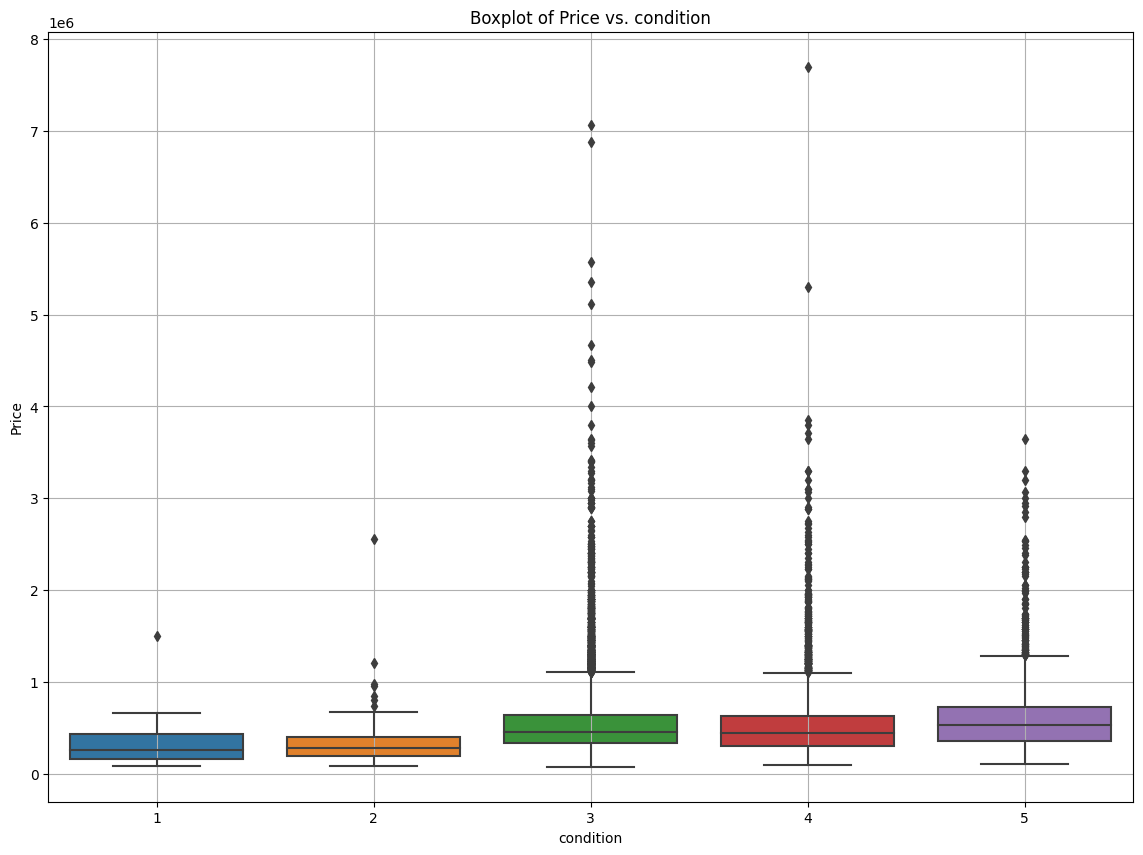

In [ ]:
plt.figure(figsize=(14, 10))
sns.boxplot(x=condi, y=price)
plt.title('Boxplot of Price vs. condition')
plt.xlabel('condition')
plt.ylabel('Price')
plt.grid(True)
plt.show()

Using the scatter plot and boxplot, we can see that 'condition' has a near zero correlation and has no linear trend since 'condition' is a numeric categorical feature so we can confidently exclude this feature.

# Section 6 and 7. Model Training and Hyperparameter Tuning

## Lasso regression Model

Lasso Regression's capacity to capture non-linear patterns ensures that the model can effectively adapt to the intricate dynamics of the housing market, providing a more accurate representation of pricing structures. With that said, the hyperparameter tuned in this notebook is the regularization parameter “alpha”, this parameter is used for controlling the strength of regularization on the model. Here are the are our findings:


It was found that by using Random Search the best alpha found is 9.1871, though it did not did not lead to a significant improvement over using a fixed alpha value of 1.


Both tuning and untuned models have similar MSE, RMSE, and R-squared values for both the training and testing sets.


The R-squared values (around 0.55) indicate that the model explains approximately 55% of the variance in the target variable.


The R-squared values are similar for training and testing, indicating that there is no obvious overfitting or underfitting.


Hyperparameter tuning is an important phase in machine learning model construction that involves determining the best settings for a model's hyperparameters. Hyperparameters are parameters that are established prior to the start of the training process and are not learnt from the data. The purpose of tuning hyperparameters is to increase the model's performance by modifying these variables.


In [ ]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement']

# Create feature matrix X and target variable y
X = data[selected_features]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Fit the linear regression model
model = Lasso(alpha =1, max_iter = 50000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print("Lasso Regression without Random Search Results:")
print(f'Mean Squared Error (Training): {mse_train}')
print(f'Mean Squared Error (Testing): {mse_test}')

print(f'Root Mean Squared Error (Training): {rmse_train}')
print(f'Root Mean Squared Error (Testing): {rmse_test}')

print(f'R-squared (Training): {r2_train}')
print(f'R-squared (Testing): {r2_test}')


Lasso Regression without Random Search Results:
Mean Squared Error (Training): 60314283880.41914
Mean Squared Error (Testing): 60874650284.47275
Root Mean Squared Error (Training): 245589.66566290843
Root Mean Squared Error (Testing): 246727.8871235936
R-squared (Training): 0.5468185891253807
R-squared (Testing): 0.5610621191986672


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.165e+14, tolerance: 2.014e+11
  model = cd_fast.enet_coordinate_descent(


Hyperparameter tuning using Random Search:

In [ ]:



X = data[selected_features]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Define the Lasso regression model
lasso = Lasso(max_iter=50000)

# Define a range of alpha values to search (regularization parameter)
alphas = uniform(loc=0.001, scale=10)  # Adjust the range as needed

# Create a parameter grid
param_dist = {'alpha': alphas}

# Use RandomizedSearchCV to find the best alpha
random_search = RandomizedSearchCV(lasso, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, random_state=5)
random_search.fit(X_train, y_train)

# Get the best alpha
best_alpha = random_search.best_params_['alpha']

# Fit the Lasso model with the best alpha
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)

y_pred_train = lasso_model.predict(X_train)
y_pred_test = lasso_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = metrics.r2_score(y_train, y_pred_train)
r2_test =  metrics.r2_score(y_test, y_pred_test)

print("Lasso Regression with Random Search Results:")
print(f'Best Alpha: {best_alpha}')
print(f'Mean Squared Error (Training): {mse_train}')
print(f'Mean Squared Error (Testing): {mse_test}')
print(f'Root Mean Squared Error (Training): {rmse_train}')
print(f'Root Mean Squared Error (Testing): {rmse_test}')
print(f'R-squared (Training): {r2_train}')
print(f'R-squared (Testing): {r2_test}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.367e+14, tolerance: 1.633e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.365e+14, tolerance: 1.629e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.364e+14, tolerance: 1.645e

Lasso Regression with Random Search Results:
Best Alpha: 9.187109079379216
Mean Squared Error (Training): 60314284833.092705
Mean Squared Error (Testing): 60874522263.60106
Root Mean Squared Error (Training): 245589.66760247204
Root Mean Squared Error (Testing): 246727.6276860803
R-squared (Training): 0.5468185819673093
R-squared (Testing): 0.5610630422957176


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.166e+14, tolerance: 2.014e+11
  model = cd_fast.enet_coordinate_descent(


# **Decision Tree Model**




Regression Decision Trees are able to capture intricate relationships between the input features and the target variable and are capable of handling both categorical and numerical features it is an appropriate choice for determining the price of a house, given that the features that are taken into consideration when determining the price of the house could either be categorical, numerical, or both. The hyperparameters that the model was able to achieve after performing a random search were the following: ‘min_samples_split’ (minimum number of samples required before an internal node is split): 4. ‘Min_impurity_decrease’ (minimum impurity that can be decreased for the nodes split): 2, ‘max_leaf_nodes’(maximum number of leaf nodes in the tree): 20, ‘max_depth’ (depth of the tree): 10


In [ ]:
#Features and Label
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement']
X = data[selected_features]
y = data['price']
print("Original X shape: ", X.shape)
print("Original y shape: ", y.shape)
data.head()

Original X shape:  (21613, 8)
Original y shape:  (21613,)


id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...        1180              0   
1      7242     2.0           0     0  ...        2170            400   
2     10000     1.0           0     0  ...         770              0   
3      5000     1.0           0     0  ...        1050            910   
4      8080     1.0           0     0  ...        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  price_normalized  
0        5650         -0.866717  
1        7639         -0.005688  
2        8062         -0.980849  
3        5000          0.174090  
4        7503         -0.081958  

[5 rows x 22 columns]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5)

print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (15129, 8)
y_train shape :  (15129,)
X_test shape :  (6484, 8)
y_test shape :  (6484,)


In [ ]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [ ]:

dtr = DecisionTreeRegressor(criterion='squared_error')

In [ ]:
dtr.fit(X_train, y_train)
train_predictions =  dtr.predict(X_train)
train_predictions

array([ 390000., 1125000.,  240000., ...,  510000.,  517000.,  455000.])

In [ ]:
def compute_mse(predictions, actual):

    mse = np.mean((predictions-actual)**2)

    return mse

def compute_mae(predictions, actual):

    mae = np.mean(np.abs(predictions - actual))
    return mae

In [ ]:
#Train values before tuning
predictions = dtr.predict(X_train)
rmse_hold = compute_mse(y_train, predictions)
rmse = np.sqrt(rmse_hold)
r2_test_rf = metrics.r2_score(y_train, predictions)
print("MSE (before tuning): ", compute_mse(y_train, predictions))
print("MAE (before tuning): ", compute_mae(y_train, predictions))
print("RMSE (before tuning): ", rmse)
print("R-squared (before tuning):", r2_test_rf)

MSE (before tuning):  96179611.59973119
MAE (before tuning):  983.8070372573645
RMSE (before tuning):  9807.12045402376
R-squared (before tuning): 0.9992773384797446


In [ ]:
#Test values before tuning
predictions = dtr.predict(X_test)
rmse_hold = compute_mse(y_test, predictions)
rmse = np.sqrt(rmse_hold)
r2_test_rf = metrics.r2_score(y_test, predictions)
print("MSE (before tuning): ", compute_mse(y_test, predictions))
print("MAE (before tuning): ", compute_mae(y_test, predictions))
print("RMSE (before tuning): ", rmse)
print(" R-squared (before tuning):", r2_test_rf)

MSE (before tuning):  91737410059.39235
MAE (before tuning):  188687.31256426073
RMSE (before tuning):  302881.8417459065
 R-squared (before tuning): 0.33852557388829185


In [ ]:
test_predictions = dtr.predict(X_test)

test_predictions

array([650000., 255000., 273000., ..., 850000., 900000., 507000.])

In [ ]:
mse = compute_mse(test_predictions, y_test)
print("Mean Squared Error :", mse)

mae = compute_mae(test_predictions, y_test)
print("Absolute Relative Error :", mae)

Mean Squared Error : 91737410059.39235
Absolute Relative Error : 188687.31256426073


In [ ]:
dtr = DecisionTreeRegressor()

Hyperparameter tuning using Random Search:

In [ ]:
dtr.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
hyperparameters = [
    {
        'min_impurity_decrease': [0.1, 1, 2, 5, 10, 20], #
        'max_depth': [1,2,5,10,15], #
        'min_samples_split': [2, 4, 6, 10, 15, 20], #
        'max_leaf_nodes': [3, 5, 10, 20, 50, 100], #
    }
]

In [ ]:
rsr = RandomizedSearchCV(dtr, hyperparameters, cv=5 , scoring='neg_mean_squared_error', random_state=42)

In [ ]:
rsr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions=[{'max_depth': [1, 2, 5, 10, 15],
                                         'max_leaf_nodes': [3, 5, 10, 20, 50,
                                                            100],
                                         'min_impurity_decrease': [0.1, 1, 2, 5,
                                                                   10, 20],
                                         'min_samples_split': [2, 4, 6, 10, 15,
                                                               20]}],
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
rsr.best_params_

{'min_samples_split': 4,
 'min_impurity_decrease': 2,
 'max_leaf_nodes': 20,
 'max_depth': 10}

In [ ]:
dtr = DecisionTreeRegressor(min_samples_split=6, min_impurity_decrease=20, max_leaf_nodes=100, max_depth=10)

In [ ]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=100,
                      min_impurity_decrease=20, min_samples_split=6)

In [ ]:
#Train values after tuning
predictions = dtr.predict(X_train)
rmse_hold = compute_mse(y_train, predictions)
rmse = np.sqrt(rmse_hold)
r2_test_rf = metrics.r2_score(y_train, predictions)
print("MSE (after tuning): ", compute_mse(y_train, predictions))
print("MAE (after tuning): ", compute_mae(y_train, predictions))
print("RMSE (after tuning): ", rmse)
print(" R-squared (after tuning):", r2_test_rf)

MSE (after tuning):  38419301775.44206
MAE (after tuning):  134275.20610993754
RMSE (after tuning):  196008.42271556103
 R-squared (after tuning): 0.7113301814553252


In [ ]:
#Test values after tuning
predictions = dtr.predict(X_test)
rmse_hold = compute_mse(y_test, predictions)
rmse = np.sqrt(rmse_hold)
r2_test_rf = metrics.r2_score(y_test, predictions)
print("MSE (after tuning): ", compute_mse(y_test, predictions))
print("MAE (after tuning): ", compute_mae(y_test, predictions))
print("RMSE (after tuning): ", rmse)
print("R-squared (after tuning):", r2_test_rf)

MSE (after tuning):  58495803399.12642
MAE (after tuning):  149455.13582372075
RMSE (after tuning):  241859.05688877235
R-squared (after tuning): 0.5782148421420482


# Random Forest Regressor

Random Forests are capable of detecting non-linear correlations between features and the target variable. The link between housing attributes and price is frequently non-linear in real estate, and Random Forests are capable of capturing these complexities. The hyperparameters we are able to tune are ‘n_estimators’ (number of trees in the forest), ‘max_features’ (the size of the random subsets of features to consider when splitting a node), ‘max_depth’ (tree depth), ‘min_samples_split’, ‘min_samples_leaf’, and ‘bootstrap’

In [ ]:


selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement']

# Create feature matrix X and target variable y
X = data[selected_features]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

rfr = RandomForestRegressor(n_estimators=300,random_state=42)
rfr.fit(X_train, y_train)

pred_train = rfr.predict(X_train)
mse_train_rf = mean_squared_error(y_train, pred_train)
rmse_train_rf = np.sqrt(mse_train_rf)
r2_train_rf = metrics.r2_score(y_train, pred_train)

pred_test = rfr.predict(X_test)
mse_test_rf = mean_squared_error(y_test, pred_test)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = metrics.r2_score(y_test, pred_test)

print("Random forest regressor train MSE:", mse_train_rf)
print("Random forest regressor train RMSE:", rmse_train_rf)
print("Random forest regressor train R-squared:", r2_train_rf)

print("Random forest regressor test MSE:", mse_test_rf)
print("Random forest regressor test RMSE:", rmse_test_rf)
print("Random forest regressor test R-squared:", r2_test_rf)

Random forest regressor train MSE: 6966967252.1502285
Random forest regressor train RMSE: 83468.36078509167
Random forest regressor train R-squared: 0.9476525319424091
Random forest regressor test MSE: 51495189107.35388
Random forest regressor test RMSE: 226925.51444770128
Random forest regressor test R-squared: 0.6286929112098544


Hyperparameter tuning using Random Search:

In [ ]:

selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement']

# Create feature matrix X and target variable y
X = data[selected_features]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(100, 500),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Create a Random Forest Regressor
rfr = RandomForestRegressor(random_state=42)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(rfr, param_distributions=param_dist, n_iter=10, cv=5,scoring='neg_mean_squared_error', random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Print the best parameters
print("Best Hyperparameters:", best_params)

# Use the best estimator for predictions
best_rfr = random_search.best_estimator_

# Predictions and evaluation with the best model
pred_train_best = best_rfr.predict(X_train)
mse_train_best = mean_squared_error(y_train, pred_train_best)
rmse_train_best = np.sqrt(mse_train_best)
r2_train_best = r2_score(y_train, pred_train_best)

pred_test_best = best_rfr.predict(X_test)
mse_test_best = mean_squared_error(y_test, pred_test_best)
rmse_test_best = np.sqrt(mse_test_best)
r2_test_best = r2_score(y_test, pred_test_best)

print("Best Random Forest regressor train MSE:", mse_train_best)
print("Best Random Forest regressor train RMSE:", rmse_train_best)
print("Best Random Forest regressor train R-squared:", r2_train_best)

print("Best Random Forest regressor test MSE:", mse_test_best)
print("Best Random Forest regressor test RMSE:", rmse_test_best)
print("Best Random Forest regressor test R-squared:", r2_test_best)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Hyperparameters: {'bootstrap': True, 'max_depth': 11, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 251}
Best Random Forest regressor train MSE: 33079572072.472874
Best Random Forest regressor train RMSE: 181877.9042997606
Best Random Forest regressor train R-squared: 0.75145112934353
Best Random Forest regressor test MSE: 48594592319.894844
Best Random Forest regressor test RMSE: 220441.8116417456
Best Random Forest regressor test R-squared: 0.6496077222354082


# Section 8.Model Selection

Below is the Summary of the modeling and hypertuning:

##Lasso Regression w/o Tuning:
 Mean Squared Error (Training): **60314283880.41914**

Mean Squared Error (Testing): **60874650284.47275**

Root Mean Squared Error (Training): **245589.66566290843**

Root Mean Squared Error (Testing): **246727.8871235936**

R-squared (Training): **0.5468185891253807**

R-squared (Testing): **0.5610621191986672**



##Lasso Regression w/ Tuning:
Best Alpha: 9.187109079379216

Mean Squared Error (Training): **60314284833.092705**

Mean Squared Error (Testing): **60874522263.60106**

Root Mean Squared Error (Training): **245589.66760247204**

Root Mean Squared Error (Testing): **246727.6276860803**

R-squared (Training): **0.5468185819673093**

R-squared (Testing): **0.5610630422957176**


##Decision Trees w/o Tuning:

Train:

MSE (before tuning):  **96179611.59973119**

MAE (before tuning):  **983.8070372573645**

RMSE (before tuning): ** 9807.12045402376**

R-squared (before tuning): **0.9992773384797446**


Test:

MSE (before tuning):  **91737410059.39235**

MAE (before tuning):  **188687.31256426073**

RMSE (before tuning):  **302881.8417459065**

R-squared (before tuning): **0.33852557388829185**



##Decision Trees w/ Training:

max_depth=10,
max_leaf_nodes=100,
min_impurity_decrease=20,
min_samples_split=6

Train:

MSE (after tuning):  **38419301775.44206**

MAE (after tuning):  **134275.20610993754**

RMSE (after tuning):  **196008.42271556103**

R-squared (after tuning): **0.7113301814553252**

Test:

MSE (after tuning):  **58495803399.12642**

MAE (after tuning):  **149455.13582372075**

RMSE (after tuning):  **241859.05688877235**

R-squared (after tuning): 0.5782148421420482

##Random Forest w/o Tuning:

Random forest regressor train MSE: **6966967252.1502285**

Random forest regressor train RMSE: **83468.36078509167**

Random forest regressor train R-squared: **0.9476525319424091**

Random forest regressor test MSE: **51495189107.35388**

Random forest regressor test RMSE: **226925.51444770128**

Random forest regressor test R-squared: **0.6286929112098544**


##Random Forest w/ Tuning:

Best Hyperparameters: {'bootstrap': True, 'max_depth': 11, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 251}

Best Random Forest regressor train MSE: **33079572072.472874**

Best Random Forest regressor train RMSE: **181877.9042997606**

Best Random Forest regressor train R-squared: **0.75145112934353**

Best Random Forest regressor test MSE: **48594592319.894844**

Best Random Forest regressor test RMSE: **220441.8116417456**

Best Random Forest regressor test R-squared: **0.6496077222354082**

While hyperparameter adjustment increased the model performance, it is necessary to examine the trade-off between training and testing performance. Because the model may be more suited to the training set, it is critical to observe its behavior on fresh, previously unknown data. Therefore **Random Forest** is our best chosen model.

# Section 9. Insights and Conclusions

Lasso Regression
Here are the are our findings:
It was found that by using Random Search the best alpha found is 9.1871, though it did not did not lead to a significant improvement over using a fixed alpha value of 1.


Both tuning and untuned models have similar MSE, RMSE, and R-squared values for both the training and testing sets.


The R-squared values (around 0.55) indicate that the model explains approximately 55% of the variance in the target variable.


The R-squared values are similar for training and testing, indicating that there is no obvious overfitting or underfitting.


Decision Tree Regression Findings
In using Random Search, it was found that the best hyper parameters for the model were: ‘min_samples_split’: 4. ‘Min_impurity_decrease’: 2, ‘max_leaf_nodes’: 20, ‘max_depth’: 10
Both tuned and untuned models have similar MSE, MAE, and R-squared, but evidently the tuned model shows better performance with lower MSE and MAE values and a higher R-squared values; showing that there has been an improvement in the model’s capability to predict the correct answer.
With an R-squared value of 0.6496077222354082, the model


Random Forest Regression Findings:
Hyperparameter tuning has significantly improved the model's performance on both the training and testing sets.
The RMSE on the testing set decreased from 226,925.51 to 220,441.81 after hyperparameter tuning, indicating a better fit.
The best hyperparameters suggest using bootstrapping, a maximum tree depth of 11, 'log2' as the maximum feature, a minimum of 4 samples per leaf, a minimum of 9 samples to split a node, and 251 trees in the forest.
The tuned model's R-squared on the testing set increased from 0.63 to 0.65, suggesting better generalization and reduced overfitting.

While hyperparameter adjustment increased model performance, it is necessary to examine the trade-off between training and testing performance. Because the model may be more suited to the training set, it is critical to observe its behavior on fresh, previously unknown data.


##Considerations

The model choice still depends on your specific goals, priorities, and the balance between model complexity, interpretability, and predictive accuracy.

If interpretability is crucial and the marginal gain in predictive accuracy is not significant, Lasso Regression might be preferred.

If predictive accuracy is the primary focus, and the complexity of the model is acceptable, the hyperparameter-tuned Random Forest could be a strong candidate.


# Section 10. References

https://scikit-learn.org/stable/modules/ensemble.html

https://www.kaggle.com/code/burhanykiyakoglu/predicting-house-prices/notebook#-Regularization

https://arize.com/blog-course/root-mean-square-error-rmse-what-you-need-to-know/

https://www.numpyninja.com/post/king-county-housing-data-analysis

https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://machinelearningmastery.com/lasso-regression-with-python/?fbclid=IwAR0YDkbVpttg3MpfGu3R6Z_JwuG3jyBPNvWHcad0d8TScbyY4RhnAHuFQ5w

https://towardsdatascience.com/why-do-we-set-a-random-state-in-machine-learning-models-bb2dc68d8431

# END